In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import lru_cache, partial
import math
from collections import namedtuple
from tqdm.auto import tqdm, trange
from solver import load_data, view_tsp, loss, to_nearest, distance
from collections import defaultdict
from ant_colony import (
    make_distance_matrix,
    run_ant_colony,
    random_route,
    plot_history,
)
from solver import (
    two_opt_v2,
    three_opt,
    randomized_opt2,
    two_opt,
    local_search,
)

Point = namedtuple("Point", ["x", "y"])


# def eucl_dist(self, point):
#     return ((self.x - point.x) ** 2 + (self.y - point.y) ** 2) ** 0.5


# Point.__sub__ = eucl_dist

ls = os.listdir
join = os.path.join

<IPython.core.display.Javascript object>

In [16]:
n, points = load_data("tsp_100_3")

# n = 50
# points = generate_tsp(n, 12)

dist = make_distance_matrix(points)
phermones = None

#Nodes: 100


<IPython.core.display.Javascript object>

In [17]:
best_solution, phermones, history = run_ant_colony(
    points,
    phermones=phermones,
    trials=200,
    q=1,
    evaporation=0.05,
    offset=0,
    alpha=1,
    beta=1,
)

<IPython.core.display.Javascript object>

[0, 12, 65, 86, 10, 75, 58, 27, 31, 56, 73, 78, 67, 98, 42, 48, 68, 41, 59, 85, 6, 23, 49, 82, 94, 30, 46, 9, 53, 61, 89, 2, 50, 34, 64, 76, 4, 91, 16, 80, 96, 14, 28, 62, 29, 26, 99, 5, 20, 88, 87, 77, 37, 47, 7, 39, 83, 36, 97, 33, 60, 1, 45, 95, 57, 71, 24, 3, 55, 51, 13, 69, 79, 90, 8, 22, 52, 18, 40, 43, 44, 21, 11, 32, 66, 74, 84, 72, 17, 70, 38, 25, 19, 92, 54, 35, 81, 63, 15, 93]


C:\Users\pooya\Codes\discrete-optim\4 tsp\ant_colony.py:34: RuntimeWarning: divide by zero encountered in true_divide
  weights = phermones ** alpha / distances ** beta


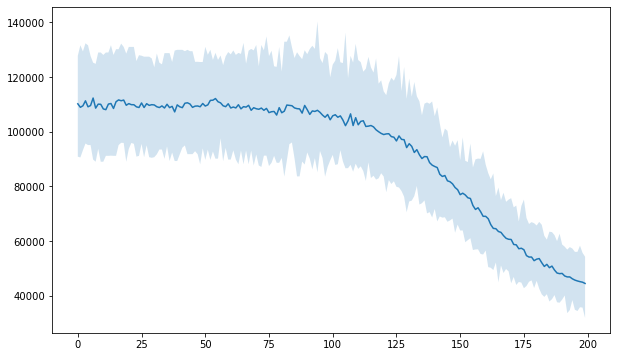

<IPython.core.display.Javascript object>

In [23]:
route = random_route(dist, phermones, alpha=1, beta=1)
print(route)
plot_history(history)

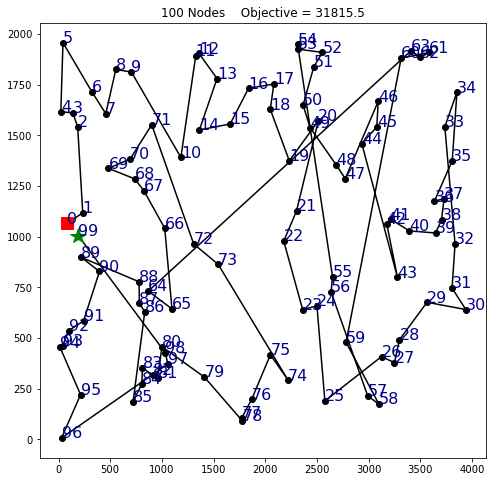

<IPython.core.display.Javascript object>

In [24]:
view_tsp(best_solution, points, show_index=True)


	* local search: Iteration #1


	23546.32 --> 23521.93
	23521.93 --> 23488.53
	23488.53 --> 23476.36
	23476.36 --> 23391.91
	23391.91 --> 23288.04
	23288.04 --> 23221.11
	23221.11 --> 23062.31
	23062.31 --> 22875.35
	22875.35 --> 22859.28

	* local search: Iteration #2


	22859.28 --> 22689.00
	22689.00 --> 22688.49
	22688.49 --> 22687.71

	* local search: Iteration #3


	22687.71 --> 22657.25

	* local search: Iteration #4



No improvement observed.


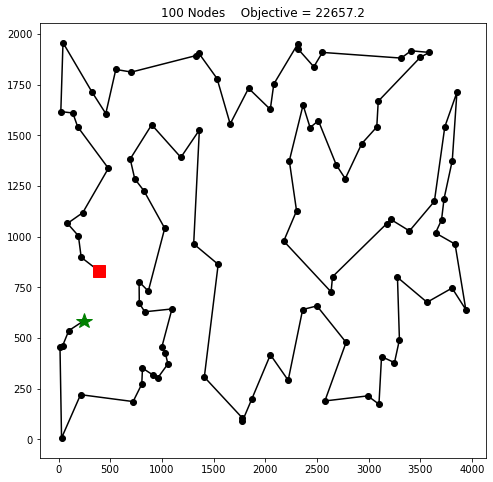

<IPython.core.display.Javascript object>

In [25]:
refined = three_opt(best_solution, points)
refined = local_search(refined, points)
view_tsp(refined, points, show_index=False)

C:\Users\pooya\Codes\discrete-optim\4 tsp\ant_colony.py:34: RuntimeWarning: divide by zero encountered in true_divide
  weights = phermones ** alpha / distances ** beta


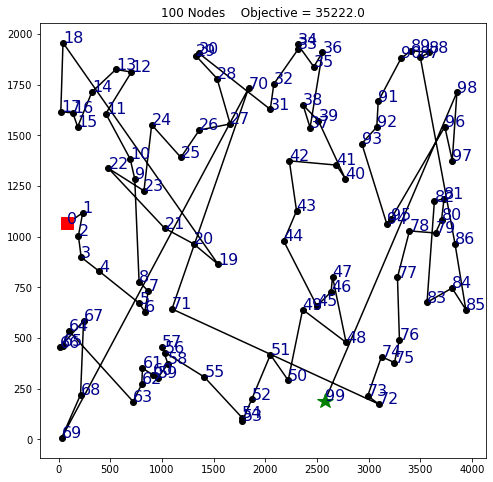

<IPython.core.display.Javascript object>

In [47]:
route = random_route(dist, phermones, alpha=0.1, beta=5)
view_tsp(route, points, show_index=True)